## Basic Exploratory Analysis

### Subtask:
Perform basic exploratory analysis on the `cleaned_merged.csv` dataset. This includes calculating:
- Average daily CPU usage per region
- Peak demand per month
- Top 5 regions by usage

**Reasoning:**
Load the `cleaned_merged.csv` file into a pandas DataFrame and verify that the 'date' column is in datetime format.

In [23]:
import pandas as pd

# Load the cleaned merged dataset
merged_df = pd.read_csv('/content/drive/MyDrive/Infosys Springboard Virtual Internship 6.0/cleaned_merged.csv')

# Convert the 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Verify that the 'date' column is converted to datetime format
print("Data type of 'date' column:", merged_df['date'].dtype)

Data type of 'date' column: datetime64[ns]


**Task 1:**
Proceed with calculating the average daily CPU usage per region.

In [24]:
# Calculate average daily CPU usage per region

avg_cpu_usage_per_region = merged_df.groupby(['date', 'region'])['usage_cpu'].mean().reset_index().reset_index(drop=True)
avg_cpu_usage_per_region.index = avg_cpu_usage_per_region.index + 1
print("\nAverage daily CPU usage per region:\n")
display(avg_cpu_usage_per_region.head())


Average daily CPU usage per region:



,date,region,usage_cpu
1,2023-01-01,East US,83.333333
2,2023-01-01,North Europe,68.666667
3,2023-01-01,Southeast Asia,82.000000
4,2023-01-01,West US,65.666667
5,2023-01-02,East US,91.666667


**Task 1:**
Now, calculate the peak demand per month. This can be determined by finding the maximum `cloud_market_demand` for each month.

In [25]:
# Calculate peak demand per month
merged_df['month'] = merged_df['date'].dt.to_period('M')
peak_demand_per_month = merged_df.groupby('month')['cloud_market_demand'].max().reset_index().reset_index(drop=True)
peak_demand_per_month.index = peak_demand_per_month.index + 1
print("\nPeak demand per month:\n")
display(peak_demand_per_month)


Peak demand per month:



,month,cloud_market_demand
1,2023-01,1.19
2,2023-02,1.25
3,2023-03,1.27


**Reasoning:**
Finally, identify the top 5 regions by total usage. Usage can be considered as the sum of `usage_cpu` and `usage_storage`.

In [26]:
# Calculate total usage per region
merged_df['total_usage'] = merged_df['usage_cpu'] + merged_df['usage_storage']
top_regions_by_usage = merged_df.groupby('region')['total_usage'].sum().sort_values(ascending=False).head(5).reset_index().reset_index(drop=True)
top_regions_by_usage.index = top_regions_by_usage.index + 1

print("\nTop 5 regions by total usage:\n")
display(top_regions_by_usage)

# Check the number of unique regions
print("\nNumber of unique regions:", merged_df['region'].nunique())


Top 5 regions by total usage:



,region,total_usage
1,West US,365054
2,East US,356155
3,North Europe,351900
4,Southeast Asia,349391



Number of unique regions: 4


## Data Visualization

### Subtask:
Create visualizations for the key findings from the exploratory analysis.

**Task 1:**
a) Visualize the average daily CPU usage per region using a line plot to show trends over time for each region.

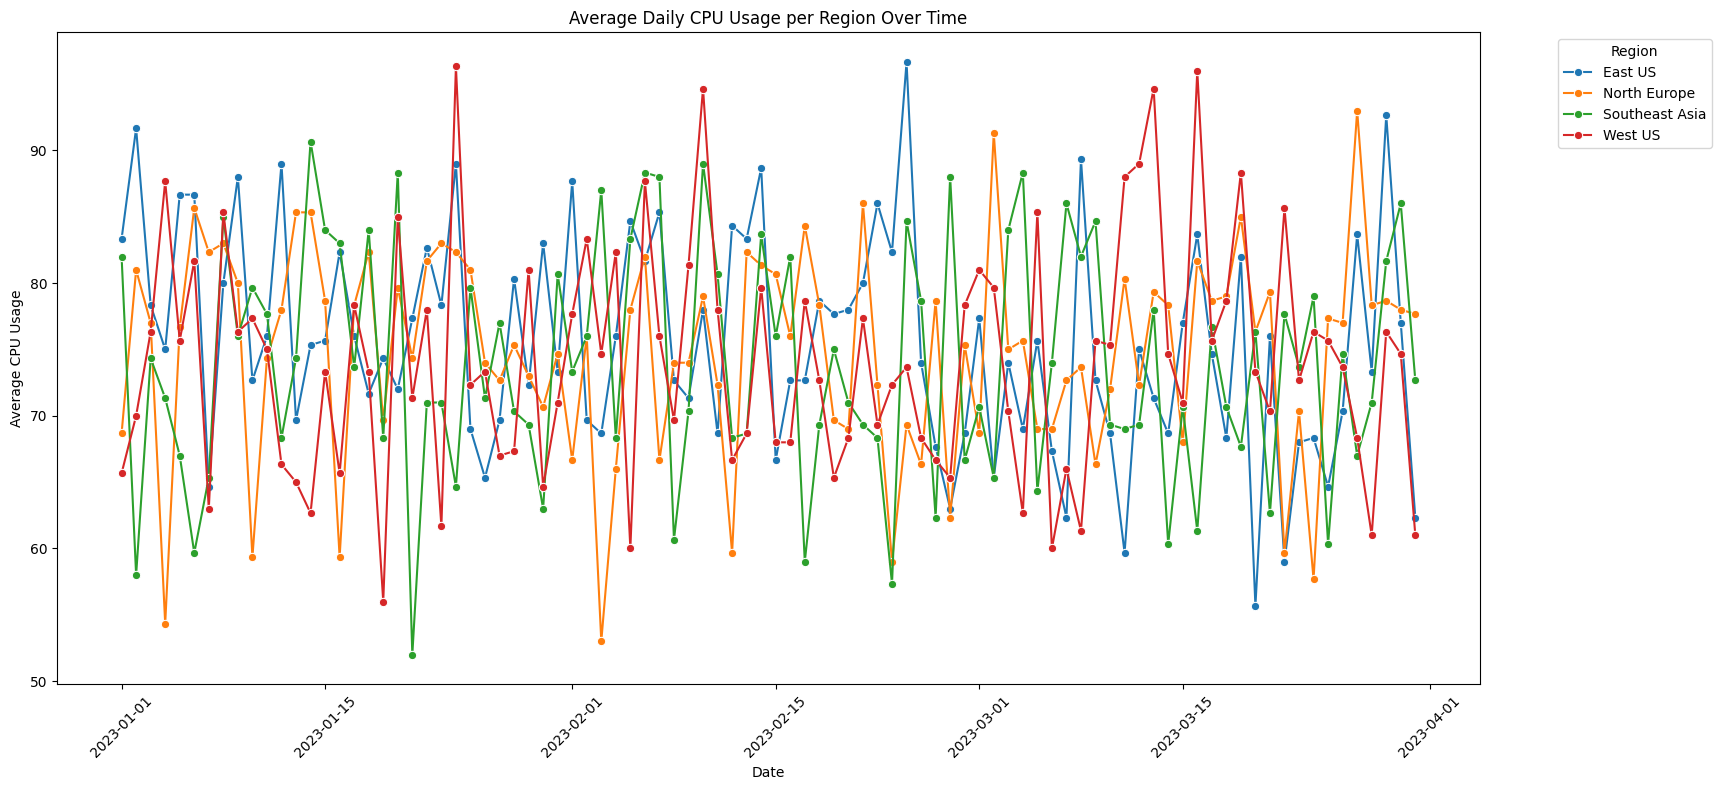

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize average daily CPU usage per region
plt.figure(figsize=(15, 8)) # Increased figure size
sns.lineplot(data=avg_cpu_usage_per_region, x='date', y='usage_cpu', hue='region', marker='o') # Added markers
plt.title('Average Daily CPU Usage per Region Over Time')
plt.xlabel('Date')
plt.ylabel('Average CPU Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.show()

b) Visualize the average daily CPU usage for each region in separate subplots to improve clarity and allow for easier comparison of trends.

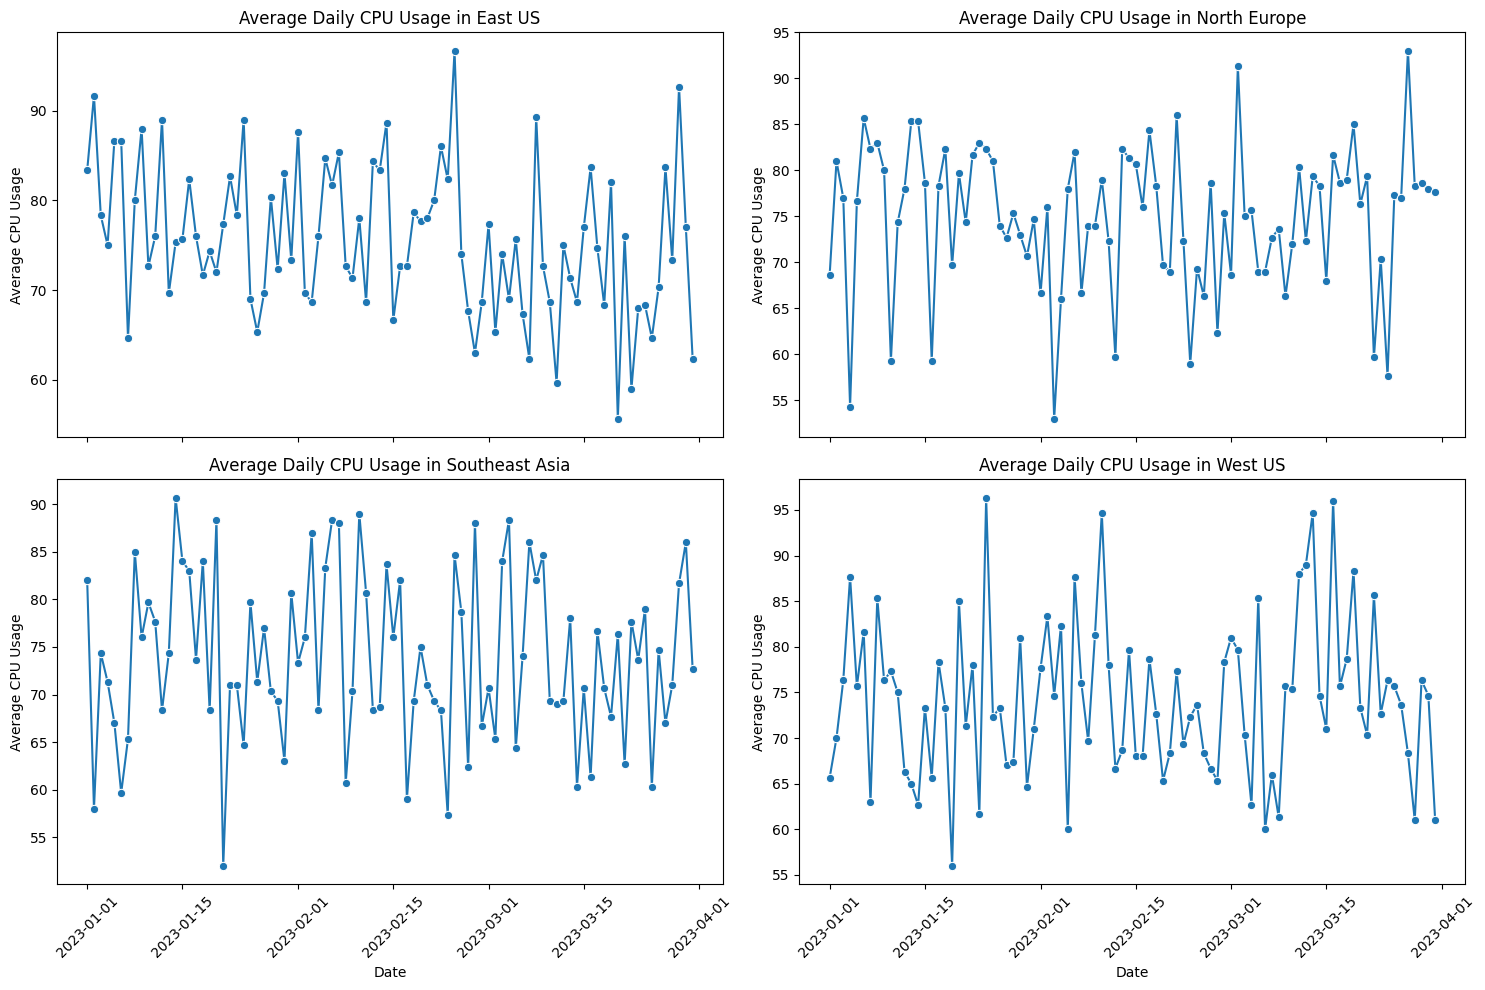

In [28]:
# Visualize average daily CPU usage per region using subplots
regions = avg_cpu_usage_per_region['region'].unique()
n_regions = len(regions)
n_cols = 2  # Number of columns for subplots
n_rows = (n_regions + n_cols - 1) // n_cols # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), sharex=True)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, region in enumerate(regions):
    sns.lineplot(data=avg_cpu_usage_per_region[avg_cpu_usage_per_region['region'] == region],
                 x='date', y='usage_cpu', ax=axes[i], marker='o')
    axes[i].set_title(f'Average Daily CPU Usage in {region}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Average CPU Usage')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Task 2:**
Visualize the peak demand per month using a bar plot to show the highest cloud market demand for each month.

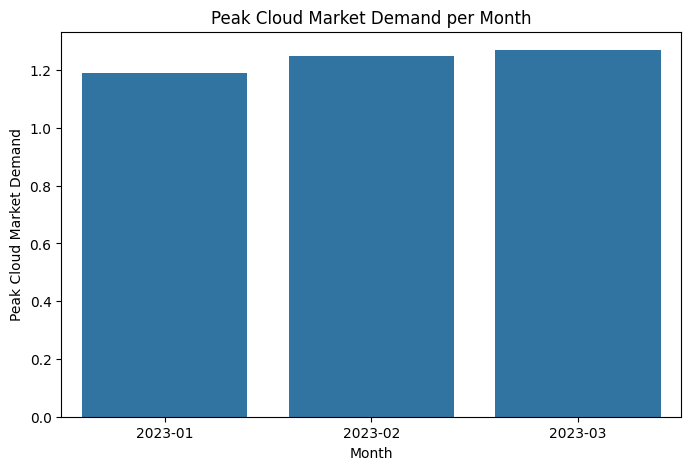

In [29]:
# Visualize peak demand per month
plt.figure(figsize=(8, 5))
sns.barplot(data=peak_demand_per_month, x='month', y='cloud_market_demand')
plt.title('Peak Cloud Market Demand per Month')
plt.xlabel('Month')
plt.ylabel('Peak Cloud Market Demand')
plt.show()

**Task 3:**
Visualize the top regions by total usage using a bar plot to compare the total usage across the top regions.

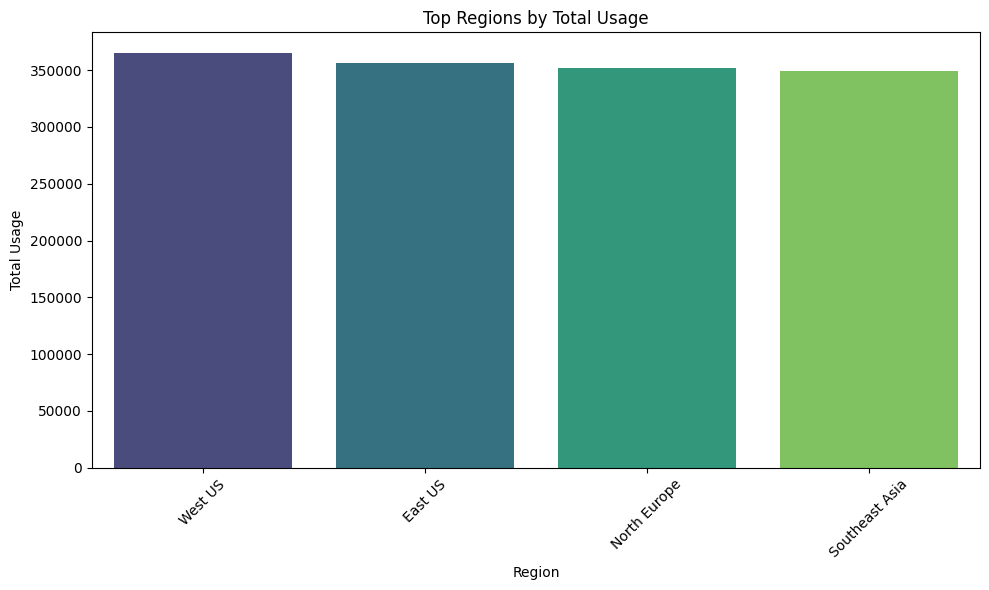

In [30]:
# Visualize top regions by total usage
plt.figure(figsize=(10, 6))
sns.barplot(data=top_regions_by_usage, x='region', y='total_usage', hue='region', palette='viridis', legend=False)
plt.title('Top Regions by Total Usage')
plt.xlabel('Region')
plt.ylabel('Total Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary of Key Findings

Based on the analysis of the `clean_merged` dataset:


*   **Average Daily CPU Usage:** The line plot shows the trend of average daily CPU usage across the different regions over the analyzed period. We can observe variations and potential patterns in usage for each region.
*   **Peak Cloud Market Demand:** The bar plot indicates the peak cloud market demand for each month. This helps in understanding the months with the highest demand for cloud resources.
*   **Top Regions by Total Usage:** The bar plot highlights the top 4 regions based on their total combined CPU and storage usage. West US, East US, North Europe, and Southeast Asia are the regions with the highest total usage in the dataset.

These findings provide initial insights into the cloud usage patterns and their relationship with external factors.